<a href="https://colab.research.google.com/github/DiegoCabreraOsorio/r-study/blob/main/Clase_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importación de datos

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ERROR: Error in library(datos): there is no package called ‘datos’


In [2]:
install.packages("datos")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘babynames’, ‘fueleconomy’, ‘gapminder’, ‘Lahman’, ‘nasaweather’, ‘nycflights13’, ‘palmerpenguins’, ‘modeldata’




La mayoría de las funciones de readr se enfocan en transformar archivos planos en data frames:

---read_csv() lee archivos delimitados por coma, read_csv2() lee archivos separados por punto y coma (comunes en países donde ‘,’ es utilizada para separar decimales), read_tsv() lee archivos delimitados por tabulaciones y read_delim() archivos con cualquier delimitador.

  ---read_fwf() lee archivos de ancho fijo. Puedes especificar los campos ya sea por su ancho, con fwf_widths(), o por su ubicación, con fwf_positions(). read_table() lee una variación común de estos archivos de ancho fijo en los que las columnas se encuentran separadas por espacios.

  ---read_log() lee archivos de registro estilo Apache. (Revisa también webreadr, que está construido sobre read_log() y proporciona muchas otras herramientas útiles).

#Modelamiento de datos

In [3]:
library(modelr)
options(na.action = na.warn)

Veamos unos datos simulados (sim1) por la librería modelr, y observemos su gráfica:

In [4]:
head(sim1)

x,y
<int>,<dbl>
1,4.199913
1,7.510634
1,2.125473
2,8.988857
2,10.243105
2,11.296823


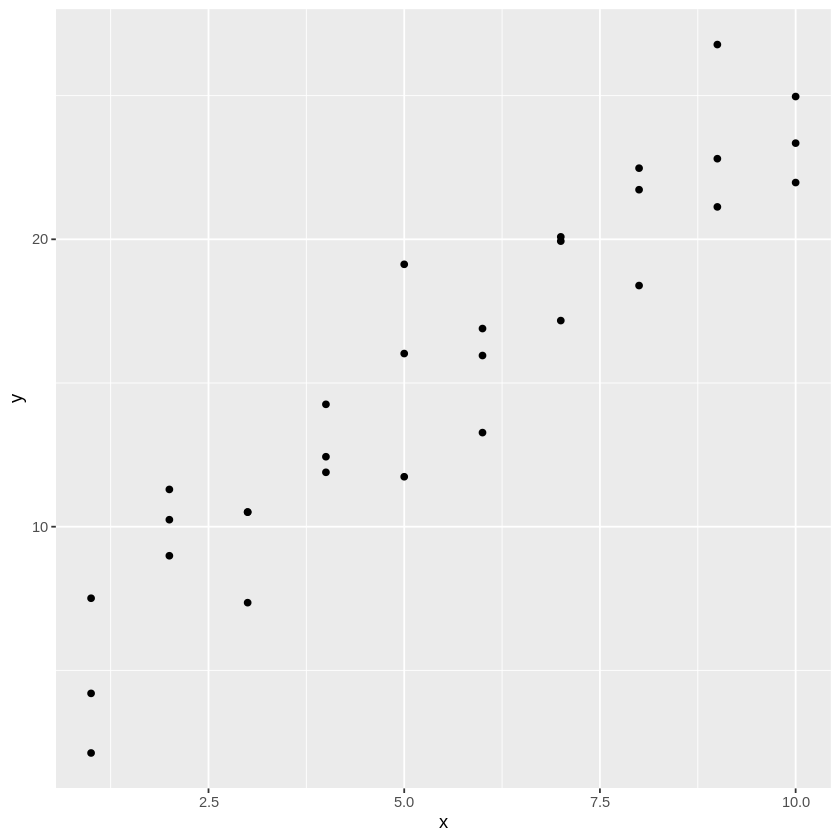

In [5]:
ggplot(sim1, aes(x,y)) +
  geom_point()

Entonces, ahora podemos decir "claro, tiene un comportamiento lineal, por lo que podríamos ajustar los datos a una función del tipo lineal".

En efecto, veamos:

In [6]:
sim1_mod <- lm(y ~ x, data=sim1)
coef(sim1_mod)

(Intercept)           x 
   4.220822    2.051533

In [7]:
coef <- coef(sim1_mod)

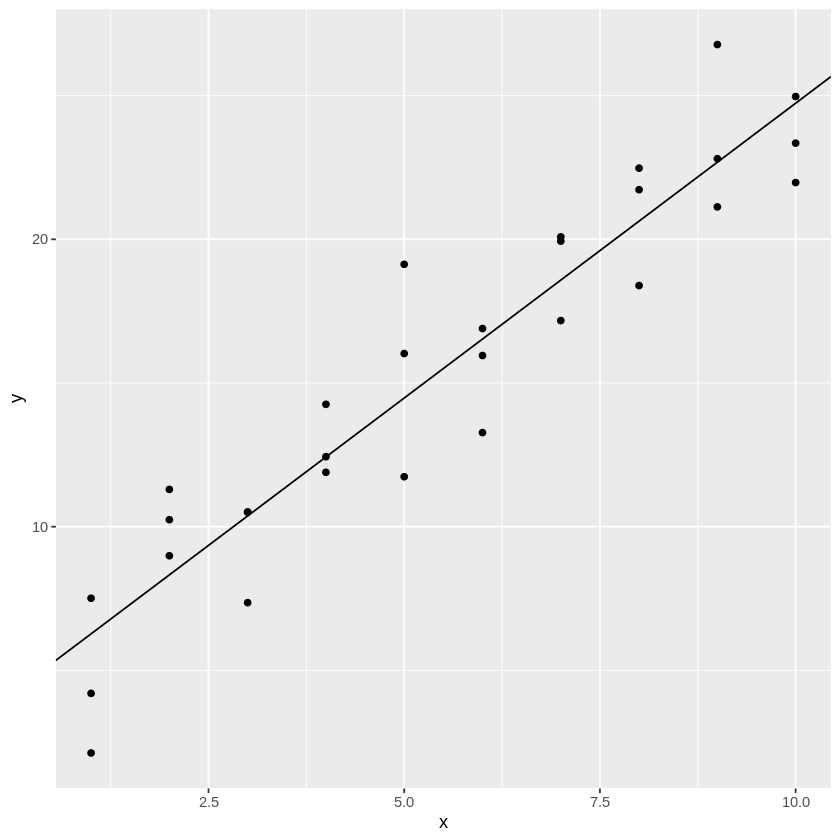

In [13]:
ggplot(sim1, aes(x,y))+
  geom_point() +
  geom_abline( intercept = coef[1], slope = coef[2])

In [16]:
library(lubridate)
library(datos)

In [21]:
diamantes2 <- diamantes %>%
  filter(quilate <= 2.5) %>% #se quita los datos de diamantes >2.5
  mutate(log_precio = log2(precio), log_quilates = log2(quilate)) #agrega estas dos columnas

In [23]:
install.packages("hexbin")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



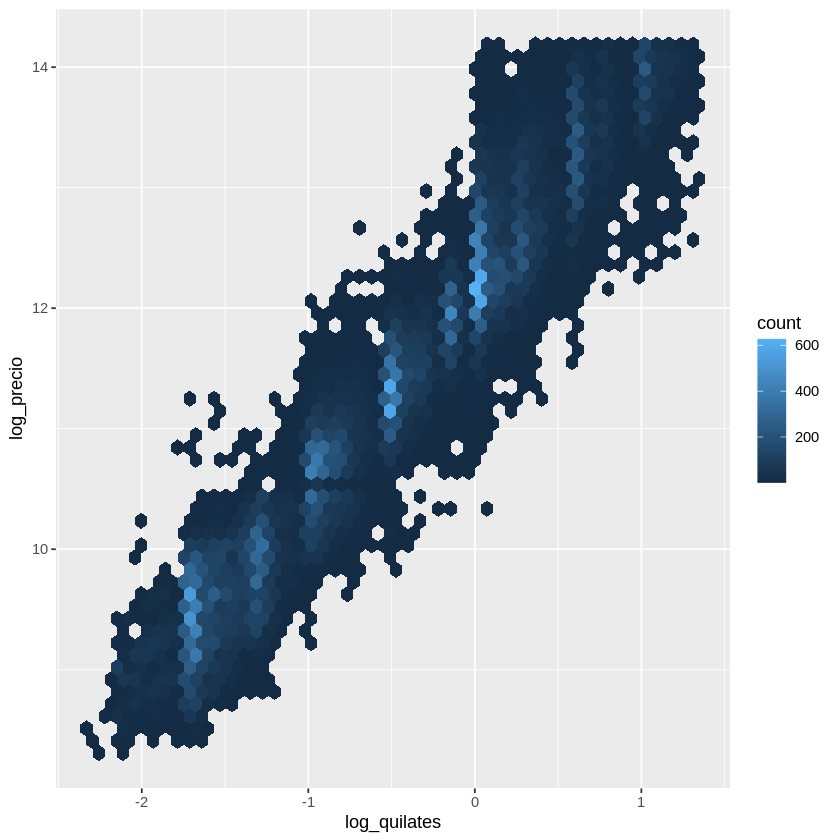

In [24]:
ggplot(diamantes2, aes(log_quilates, log_precio)) +
  geom_hex(bins = 50)

Ahora veamos el modelo:

In [25]:
mod_diamantes <- lm(log_precio ~ log_quilates, data = diamantes2)

Veamos que significa esto, el modelo como si sólo no nos sirve si no le entregamos información:

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


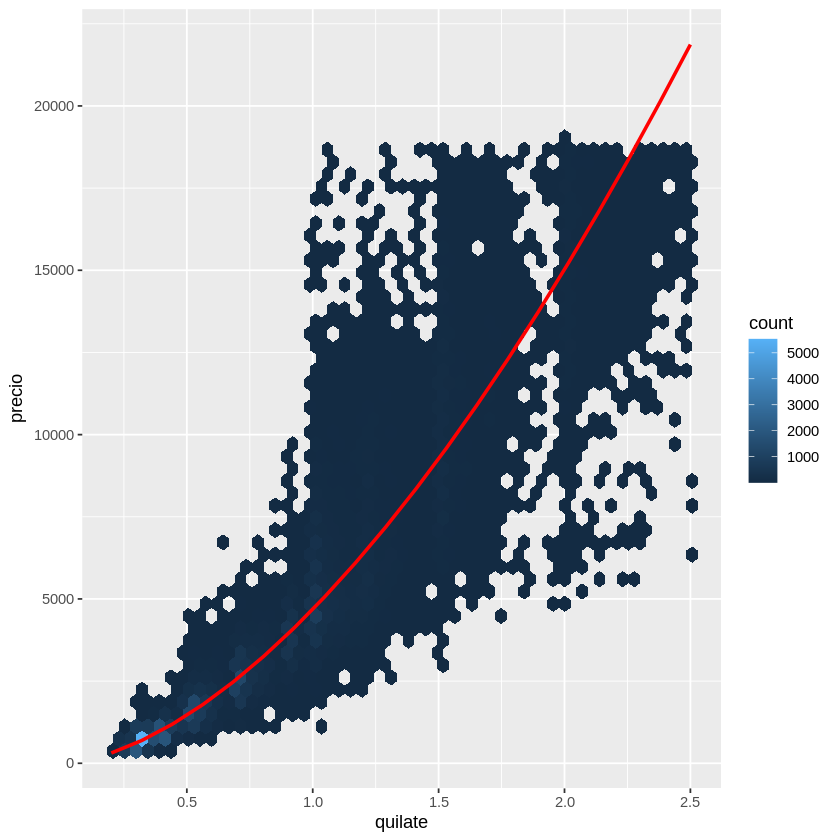

In [26]:
cuadricula <- diamantes2 %>% #creo un nuevo conjunto de datos
  data_grid(quilate = seq_range(quilate, 20)) %>% #sólo con fila quilates, pero secuenciada
  mutate(log_quilates = log2(quilate)) %>% #agrego log_quilates de la secuenciación
  add_predictions(mod_diamantes, "log_precio") %>%  #hago mi predicción, y le llamo log_precio
  mutate(precio = 2 ^ log_precio) #como esta prediccion es logaritmica, me devuelvo

ggplot(diamantes2, aes(quilate, precio)) +
  geom_hex(bins = 50) +
  geom_line(data = cuadricula, colour = "red", size = 1)

No sé donde seguiremos la próxima clase, ya lo veremos!